[View in Colaboratory](https://colab.research.google.com/github/titu1994/Neural-Style-Transfer/blob/master/NeuralStyleTransfer.ipynb)

In [1]:
!git clone https://github.com/titu1994/Neural-Style-Transfer.git

Cloning into 'Neural-Style-Transfer'...
remote: Counting objects: 1315, done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 1315 (delta 12), reused 26 (delta 8), pack-reused 1280
Receiving objects: 100% (1315/1315), 64.99 MiB | 3.55 MiB/s, done.
Resolving deltas: 100% (770/770), done.


In [0]:
dir_path = "Neural-Style-Transfer"

# Network Type

Choose the network type below : 

- "Network" for the original style transfer
- "INetwork" for the improved style transfer (default)

In [0]:
NETWORK = 'INetwork' + '.py'

In [4]:
# List all the arguments that can be supplied to Network.py
!python {dir_path}/{NETWORK} -h

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
usage: INetwork.py [-h] [--style_masks STYLE_MASKS [STYLE_MASKS ...]]
                   [--content_mask CONTENT_MASK] [--color_mask COLOR_MASK]
                   [--image_size IMG_SIZE] [--content_weight CONTENT_WEIGHT]
                   [--style_weight STYLE_WEIGHT [STYLE_WEIGHT ...]]
                   [--style_scale STYLE_SCALE]
                   [--total_variation_weight TV_WEIGHT] [--num_iter NUM_ITER]
                   [--model MODEL] [--content_loss_type CONTENT_LOSS_TYPE]
                   [--rescale_image RESCALE_IMAGE]
                   [--rescale_method RESCALE_METHOD]
                   [--maintain_aspect_ratio MAINTAIN_ASPECT_RATIO]
         

# Network Parameters

Here, we will setup all of the parameters for the `Network.py` script.

In [0]:
# Image size
IMAGE_SIZE = 500

# Loss Weights
CONTENT_WEIGHT = 0.025
STYLE_WEIGHT = 1.0
STYLE_SCALE = 1.0
TOTAL_VARIATION_WEIGHT = 8.5e-5
CONTENT_LOSS_TYPE = 0

# Training arguments
NUM_ITERATIONS = 10
MODEL = 'vgg19'
RESCALE_IMAGE = 'false'
MAINTAIN_ASPECT_RATIO = 'false'  # Set to false if OOM occurs

# Transfer Arguments
CONTENT_LAYER = 'conv' + '5_2'  # only change the number 5_2 to something in a similar format
INITIALIZATION_IMAGE = 'content'
POOLING_TYPE = 'max'

# Extra arguments
PRESERVE_COLOR = 'false'
MIN_IMPROVEMENT = 0.0


# Content Image

Run the below cell to upload the Content Image. Make sure to select **just 1 image**

In [25]:
from google.colab import files

content_img = files.upload()

Saving night sky.jpg to night sky.jpg


In [29]:
import os

CONTENT_IMAGE_FN = list(content_img)[0]
CONTENT_IMAGE_FN_temp = CONTENT_IMAGE_FN.strip().replace(" ", "_")

if CONTENT_IMAGE_FN != CONTENT_IMAGE_FN_temp:
  os.rename(CONTENT_IMAGE_FN, CONTENT_IMAGE_FN_temp)
  CONTENT_IMAGE_FN = CONTENT_IMAGE_FN_temp
  
print("Content image filename :", CONTENT_IMAGE_FN)

Content image filename : night_sky.jpg


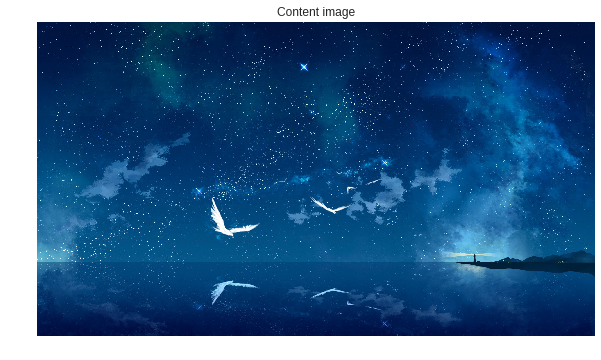

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
img = plt.imread(CONTENT_IMAGE_FN)
plt.axis('off')
plt.title('Content image')
plt.imshow(img)

# Style Image

Run the below cell to upload the Style Image. Make sure to select **just 1 image**

In [33]:
style_img = files.upload()

Saving blue_swirls.jpg to blue_swirls.jpg


In [34]:
STYLE_IMAGE_FN = list(style_img)[0]
STYLE_IMAGE_FN_temp = STYLE_IMAGE_FN.strip().replace(" ", "_")

if STYLE_IMAGE_FN != STYLE_IMAGE_FN_temp:
  os.rename(STYLE_IMAGE_FN, STYLE_IMAGE_FN_temp)
  STYLE_IMAGE_FN = STYLE_IMAGE_FN_temp
  
print("Style image filename :", STYLE_IMAGE_FN)

Style image filename : blue_swirls.jpg


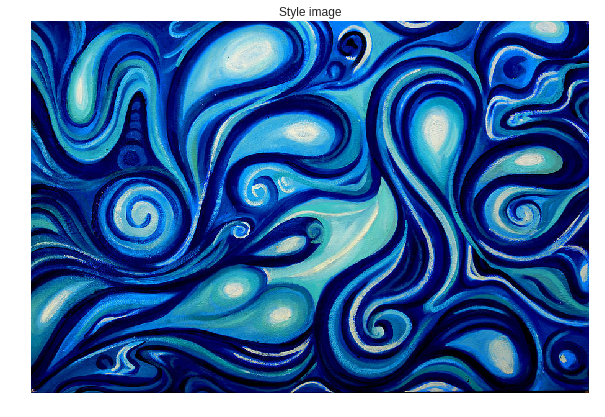

In [35]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(STYLE_IMAGE_FN)
plt.axis('off')
plt.title('Style image')
plt.imshow(img)

# Generate Image

Run the below cells to generate the image

In [0]:
import os

RESULT_DIR = "generated/"
RESULT_PREFIX = RESULT_DIR + "gen"
FINAL_IMAGE_PATH = RESULT_PREFIX + "_at_iteration_%d.png" % (NUM_ITERATIONS)

if not os.path.exists(RESULT_DIR):
  os.makedirs(RESULT_DIR)

In [37]:
!python {dir_path}/{NETWORK} {CONTENT_IMAGE_FN} {STYLE_IMAGE_FN} {RESULT_PREFIX} \
  --image_size {IMAGE_SIZE} --content_weight {CONTENT_WEIGHT} --style_weight \
  {STYLE_WEIGHT} --style_scale {STYLE_SCALE} --total_variation_weight \
  {TOTAL_VARIATION_WEIGHT} --content_loss_type {CONTENT_LOSS_TYPE} --num_iter \
  {NUM_ITERATIONS} --model {MODEL} --rescale_image {RESCALE_IMAGE} \
  --maintain_aspect_ratio {MAINTAIN_ASPECT_RATIO} --content_layer {CONTENT_LAYER} \
  --init_image {INITIALIZATION_IMAGE} --pool_type {POOLING_TYPE} --preserve_color \
  {PRESERVE_COLOR} --min_improvement {MIN_IMPROVEMENT}

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):
2018-06-13 05:27:59.105307: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read fro

Image saved as generatedgen_at_iteration_13.png
Iteration 13 completed in 29s
Starting iteration 14 of 15
Current loss value: 84159470.0  Improvement : 4.083 %
Rescaling Image to (500, 888)
Image saved as generatedgen_at_iteration_14.png
Iteration 14 completed in 29s
Starting iteration 15 of 15
Current loss value: 81383016.0  Improvement : 3.299 %
Rescaling Image to (500, 888)
Image saved as generatedgen_at_iteration_15.png
Iteration 15 completed in 28s


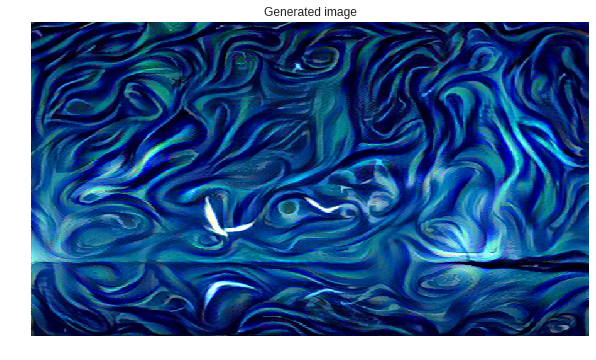

In [40]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Generated image')
plt.imshow(img)

# (Optional) Color Transfer

If you wish for color transfer between the content image and the generated image, then run the next cell, else skip to "Download Generated Image" section

In [50]:
COLOR_TRANSFER = 'color_transfer.py'
COLOR_FINAL_IMAGE_PATH = FINAL_IMAGE_PATH[:-4] + '_%s_color.png'

# Optional - Use Histogram matching (0 for no, 1 for yes)
HISTOGRAM_MATCH = 0

if HISTOGRAM_MATCH == 0:
  COLOR_FINAL_IMAGE_PATH = COLOR_FINAL_IMAGE_PATH % ('original')
else:
  COLOR_FINAL_IMAGE_PATH = COLOR_FINAL_IMAGE_PATH % ('histogram')
  

!python {dir_path}/{COLOR_TRANSFER} {CONTENT_IMAGE_FN} {FINAL_IMAGE_PATH} --hist_match {HISTOGRAM_MATCH}


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):
Image saved at path : generatedgen_at_iteration_15_original_color.png


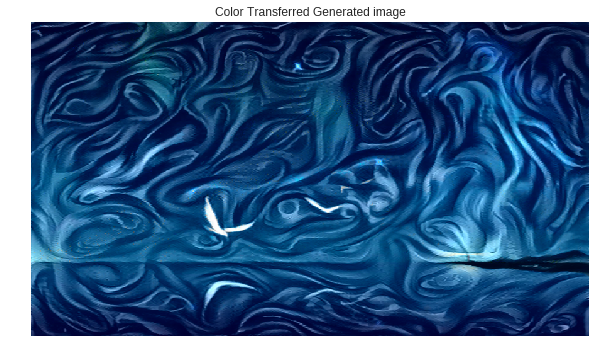

In [51]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(COLOR_FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Color Transferred Generated image')
plt.imshow(img)

# Download Color Transfered Image

Run the following cell to download the color transferred result

In [0]:
# download the color transfered image
files.download(COLOR_FINAL_IMAGE_PATH)

# Download Generated Image

Run the following cell to download the final result

In [0]:
files.download(FINAL_IMAGE_PATH)